In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [ ]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold,ShuffleSplit, cross_validate
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
import pandas as pd
from babel.numbers import format_currency
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.svm import SVC  
from xgboost import XGBClassifier
import random
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.svm import NuSVC
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, average_precision_score, precision_recall_curve
from mlxtend.classifier import EnsembleVoteClassifier

seed = 0

def confusion_mx(y, y_predict, labels = [0,1]):
    cm = confusion_matrix(y, predictions, labels)
    plt.figure(figsize=(4,3))
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax,fmt='g')
    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels([0, 1])
    ax.yaxis.set_ticklabels([0, 1])
    plt.show()
def predict_metrics(y, predictions):
    print(classification_report(y,predictions)) 
    print('>>> Accuracy:',np.round(accuracy_score(predictions, y),3),'<<<')
    confusion_mx(y,predictions)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be im

In [ ]:
data_path="Data.xlsx"

df=pd.read_excel(data_path, index_col=0)

In [ ]:
from sklearn.model_selection import train_test_split 
seed = 0
test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ['Response']), df['Response'], test_size=test_size, random_state=seed, stratify = df['Response'])



NameError: ignored

In [ ]:
df = pd.concat([x_train,y_train], axis = 1)

# export to csv test partition

df_test = pd.concat([x_test, y_test], axis = 1)
df_test.to_excel("df_TEST.xlsx")

print('Train Nr. obs:\t{}\t==> {:.2%} of Data'.format(df.shape[0],df.shape[0]/2240))
print('Test Nr. obs:\t{}\t==> {:.2%} of Data'.format(df_test.shape[0],df_test.shape[0]/2240))

Train Nr. obs:	1792	==> 80.00% of Data
Test Nr. obs:	448	==> 20.00% of Data


In [ ]:
# Data in right Format

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# test

df_test['Dt_Customer'] = pd.to_datetime(df_test['Dt_Customer'])

In [ ]:
display(df.head(3))
print(df.info(), "\nResponse rate: {}%".format(round(100*df["Response"].mean(), 2)))

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
67,1972,Master,Single,46423.0,1,1,2013-09-18,6,68,0,...,7,0,0,0,0,0,0,3,11,0
3828,1951,Graduation,Married,71107.0,0,1,2013-02-17,61,533,10,...,4,0,0,0,0,0,0,3,11,0
3409,1984,Graduation,Single,36108.0,1,0,2013-10-15,68,141,8,...,9,1,0,0,0,0,0,3,11,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1792 entries, 67 to 8026
Data columns (total 28 columns):
Year_Birth             1792 non-null int64
Education              1792 non-null object
Marital_Status         1792 non-null object
Income                 1772 non-null float64
Kidhome                1792 non-null int64
Teenhome               1792 non-null int64
Dt_Customer            1792 non-null datetime64[ns]
Recency                1792 non-null int64
MntWines               1792 non-null int64
MntFruits              1792 non-null int64
MntMeatProducts        1792 non-null int64
MntFishProducts        1792 non-null int64
MntSweetProducts       1792 non-null int64
MntGoldProds           1792 non-null int64
NumDealsPurchases      1792 non-null int64
NumWebPurchases        1792 non-null int64
NumCatalogPurchases    1792 non-null int64
NumStorePurchases      1792 non-null int64
NumWebVisitsMonth      1792 non-null int64
AcceptedCmp3           1792 non-null int64
AcceptedCmp4       

In [ ]:
# Get dataset size saved

df_original_size = len(df)
print (">>>",df_original_size,"Observations")

>>> 1792 Observations


In [ ]:
# function that returns number of missings, percentage of missings and if it is above or below 3% threshold

def missing_values_reporter(df):    
    na_count = df.isna().sum() 
    ser = na_count[na_count > 0]
    ser_p = np.round(ser.divide(df.shape[0])*100,2)
    tmp = pd.DataFrame({"N missings": ser,"% missings": ser_p,"Above Threshold (3%)": False})
    tmp.loc[tmp["% missings"] > 3., 'Above Threshold (3%)'] = 'True' 
    return tmp

In [ ]:
df_miss=missing_values_reporter(df)
df_miss

,N missings,% missings,Above Threshold (3%)
Income,20,1.12,False


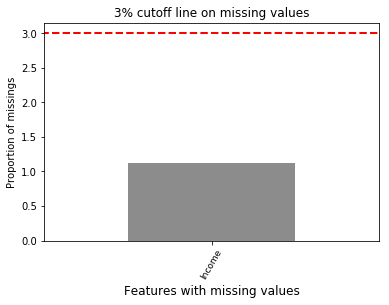

In [ ]:
# cutoff is in percentage

cutoff_ = 3

cutoff_list = [cutoff_, cutoff_]
#plt.figure(figsize=(15,5))
ax = df_miss.sort_values('% missings', ascending=False).plot.bar(y="% missings", 
                                                                 color="Grey",
                                                                 alpha = 0.9,
                                                                 title="{}% cutoff line on missing values".format(cutoff_),
                                                                 legend=False)
ax.set_xlabel("Features with missing values", size=12)
ax.set_ylabel("Proportion of missings")
ax.plot([-1, len(df_miss.index)], cutoff_list,'r--', lw=2)
ax.set_xticklabels(df_miss.index, rotation=60, size=9)
plt.show()

In [ ]:
# delete missing values (automate process..)

df.dropna(inplace=True)

# test
#df_test.dropna(inplace=True)

In [ ]:
df.shape

(1772, 28)

# Describe categorical features

In [ ]:
df.describe(include=["object", "category"])

,Education,Marital_Status
count,1772,1772
unique,5,8
top,Graduation,Married
freq,895,686


In [ ]:
def describe_cat(df, list_cfeatures, target):
    cat_list = []
    for feature in df[list_cfeatures]:    
        cat_list.append(df.groupby([feature]).agg({target: ['count', "mean"]}))
    return pd.concat(cat_list, axis=0, keys=list_cfeatures)

In [ ]:
df_cat=describe_cat(df, df.select_dtypes(include=["object", "category"]).columns, "Response")
df_cat

Response          
                             count      mean
Education      2n Cycle        152  0.098684
               Basic            48  0.041667
               Graduation      895  0.140782
               Master          296  0.155405
               PhD             381  0.202100
Marital_Status Absurd            2  0.500000
               Alone             2  0.500000
               Divorced        183  0.224044
               Married         686  0.102041
               Single          377  0.230769
               Together        454  0.110132
               Widow            66  0.227273
               YOLO              2  0.500000

# !!!!!!!!!!!!!
# Missings nas categoricas

In [ ]:
# remove unwanted categories

education_cat = ['2n Cycle','Basic','Graduation','Master','PhD']
marital_cat = ['Divorced','Divorced','Married','Single','Together','Widow']

df = df[df['Education'].isin(education_cat)]
df = df[df['Marital_Status'].isin(marital_cat)]

# test

#df_test = df_test[df_test['Education'].isin(education_cat)]
#df_test = df_test[df_test['Marital_Status'].isin(marital_cat)]

In [ ]:
df_cat=describe_cat(df, df.select_dtypes(include=["object", "category"]).columns, "Response")
df_cat

Response          
                             count      mean
Education      2n Cycle        152  0.098684
               Basic            48  0.041667
               Graduation      894  0.139821
               Master          294  0.156463
               PhD             378  0.198413
Marital_Status Divorced        183  0.224044
               Married         686  0.102041
               Single          377  0.230769
               Together        454  0.110132
               Widow            66  0.227273

In [ ]:
import matplotlib.ticker as mtick
def categorical_discrimination_plot(df, list_cfeatures, target):
    rm_df_cat = describe_cat(df, list_cfeatures, target)

    cutoff_ = df[target].mean()
    cutoff_list = [cutoff_, cutoff_]
    
    for feature in list_cfeatures:
        df_cat=rm_df_cat.iloc[:, 1][feature].sort_values(ascending=False)
        color_t = ['grey' if x > cutoff_ else 'lightgrey' for x in df_cat]
        plt.figure(figsize=(15,5))
        ax = df_cat.plot.bar(color=color_t,
                             alpha = 0.9,
                             title="{}% cutoff line on discrimination ability".format(round(cutoff_*100, 2)),
                             legend=False)
        ax.set_xticklabels(df_cat.index, rotation=60, size=9)  
        ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
        ax.set_ylabel("Proportion of respondents")
        ax.set_xlabel(feature)
        ax.plot([-1, len(df_cat)], cutoff_list,'r--', lw=2.5, color='firebrick')
        plt.show()

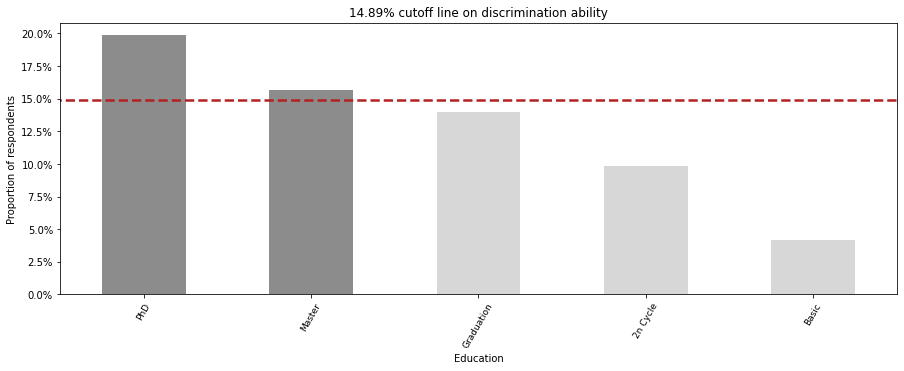

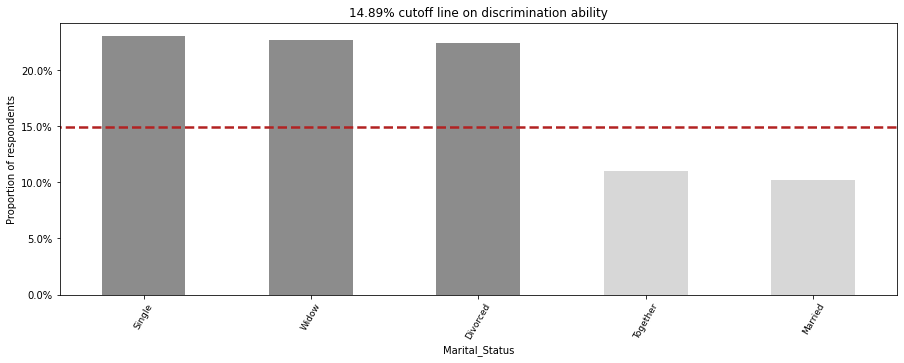

In [ ]:
categorical_discrimination_plot(df, df.select_dtypes(include=["object", "category"]).columns, "Response")

# Describe numerical features

In [ ]:
describe_num=df.describe(percentiles=np.arange(0.2, .8, .2))
display(describe_num)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.0,1766.0,1766.000000
mean,1968.855040,51610.984711,0.441676,0.506795,48.771234,299.983579,25.944507,166.294451,36.650623,26.574745,43.610419,2.345413,4.060023,2.646093,5.791619,5.343148,0.070781,0.070215,0.071348,0.061721,0.013590,0.008494,3.0,11.0,0.148924
std,11.848976,21773.344045,0.531976,0.542483,29.027208,334.011895,39.598685,226.885089,53.410598,40.771926,51.858426,1.949983,2.768462,2.958428,3.270377,2.398778,0.256532,0.255582,0.257478,0.240717,0.115814,0.091795,0.0,0.0,0.356115
min,1899.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
20%,1957.000000,31761.000000,0.000000,0.000000,19.000000,15.000000,1.000000,11.000000,2.000000,1.000000,6.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
40%,1967.000000,44159.000000,0.000000,0.000000,38.000000,79.000000,4.000000,34.000000,7.000000,5.000000,16.000000,1.000000,3.000000,1.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51038.000000,0.000000,0.000000,49.000000,171.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,3.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
60%,1973.000000,57957.000000,1.000000,1.000000,58.000000,277.000000,14.000000,108.000000,20.000000,14.000000,34.000000,2.000000,4.000000,2.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
80%,1979.000000,71391.000000,1.000000,1.000000,79.000000,577.000000,43.000000,292.000000,65.000000,44.000000,72.000000,3.000000,6.000000,5.000000,9.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
# remove useless columns -> Variance equal to zero

In [ ]:
const=describe_num.columns[describe_num.loc["std"]<0.01]
print("Columns with zero or almost zero variance to be removed:\n", 
      list(const))

# remove constants
df.drop(labels=const, axis=1, inplace=True) 

# test

df_test.drop(labels=const, axis=1, inplace=True)

Columns with zero or almost zero variance to be removed:
 ['Z_CostContact', 'Z_Revenue']


# Remove duplicates with different Response values

In [ ]:
df_x = df.drop(columns='Response')
df_y = df.Response

In [ ]:
df_x[df_x.duplicated(keep=False)].sort_values(by='Income').head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
ID,,,,,,,,,,,,,,,,,,,,,,,,,
10617,1989,Master,Divorced,10979.0,0,0,2014-05-22,34,8,4,10,2,2,4,2,3,0,3,5,0,0,0,0,0,0
6864,1989,Master,Divorced,10979.0,0,0,2014-05-22,34,8,4,10,2,2,4,2,3,0,3,5,0,0,0,0,0,0
234,1979,Graduation,Divorced,15287.0,1,0,2012-10-10,60,1,2,8,4,3,13,2,1,1,2,7,1,0,0,0,0,0
10264,1979,Graduation,Divorced,15287.0,1,0,2012-10-10,60,1,2,8,4,3,13,2,1,1,2,7,1,0,0,0,0,0
8420,1970,2n Cycle,Married,15315.0,0,0,2013-08-03,27,7,4,13,15,8,17,2,2,0,4,5,0,0,0,0,0,0


In [ ]:
print('Duplicate observations with different target values:',len(df_x[df_x.duplicated(keep=False)])-len(df[df.duplicated(keep=False)]))

Duplicate observations with different target values: 20


In [ ]:
duplicates_no_target = list(df_x[df_x.duplicated(keep=False)].index)
duplicates_target = list(df[df.duplicated(keep=False)].index.values)

In [ ]:
idx_remove = list(set(duplicates_no_target) - set(duplicates_target))
len(idx_remove)

20

In [ ]:
df = df[~df.index.isin(idx_remove)]

# Correlation

In [ ]:
target = "Response"
df[target]=df[target].astype('object')
feature_list = df.select_dtypes(include=["int64", "Float64"]).columns.values
feature_list = [x for x in feature_list if not x.startswith(("Year_B","AcceptedCmp"))]
feature_list.append(target)

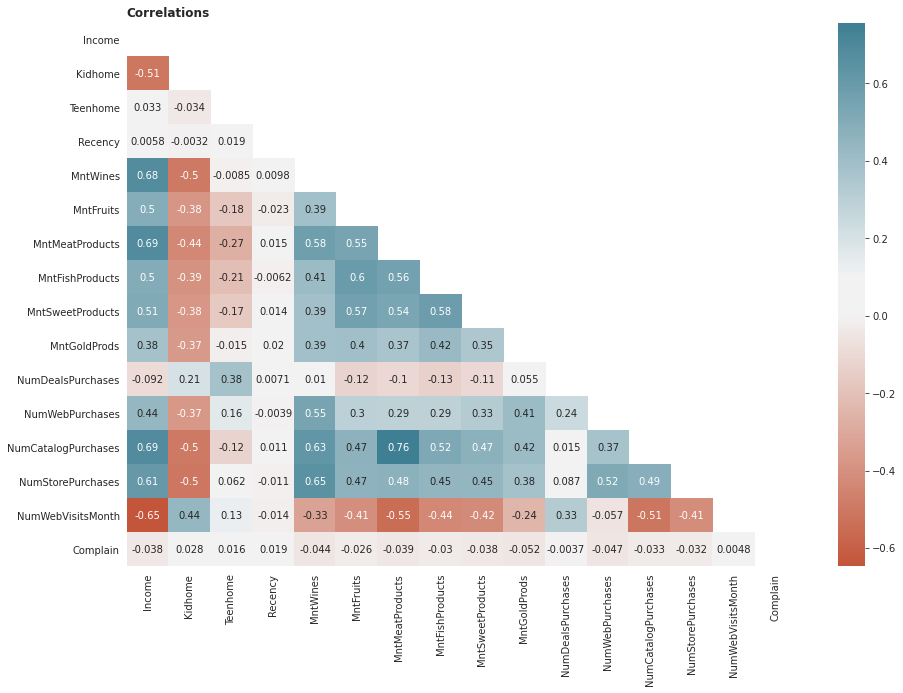

In [ ]:
cmap = sns.diverging_palette(20, 220, sep = 20, as_cmap=True)


corr = df[feature_list].corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize = (15,10))
    sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            linewidths=0, annot= True,mask=mask,square=False, cmap = cmap)
plt.title("Correlations", loc = "left", fontweight = "bold")
plt.show()

In [ ]:
df.to_excel("df_01.xlsx")
df_test.to_excel('df_test_01.xlsx')

In [ ]:
models= [LogisticRegression(random_state = seed, n_jobs = n_jobs),
         MultinomialNB(),
         BernoulliNB(),
         GaussianNB(),
         PassiveAggressiveClassifier(random_state=seed, n_jobs = n_jobs), # parece ser bom
         NuSVC(random_state=seed, gamma='scale'), # bom
         LabelPropagation(n_jobs = n_jobs, alpha = 0, kernel='knn'),
         LabelSpreading(n_jobs = n_jobs, kernel = 'knn'),
         RandomForestClassifier(random_state = seed,n_jobs = n_jobs),
         SGDClassifier(random_state = seed,n_jobs = n_jobs),
         DecisionTreeClassifier(random_state = seed),
         XGBClassifier(random_state = seed,n_jobs = n_jobs),
         GradientBoostingClassifier(random_state = seed),
         RidgeClassifier(random_state = seed),
         SVC(random_state = seed,kernel='linear'),
         KNeighborsClassifier(n_jobs = n_jobs),
         NearestCentroid(),
         QuadraticDiscriminantAnalysis(),
         LinearDiscriminantAnalysis()]


In [ ]:
from sklearn.ensemble import BaggingClassifier
#compare_models = pd.DataFrame({'acc':0})
acc_simple = []
rec_simple = []
simple_names=[]

acc_bag = []
rec_bag = []
bag_names = []

for model in tqdm(models):
    
    model_name = model.__class__.__name__
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    #print("Original Results of: ", (model_name), '\n')
    #print(classification_report(y_test,predictions))
    
    acc_simple.append(np.round(accuracy_score(predictions, y_test),3))
    rec_simple.append(np.round(recall_score( y_test, predictions),3))
    simple_names.append(model_name)
    
    bagging_clf = BaggingClassifier(model, random_state=seed)
    
    bagging_clf.fit(x_train, y_train)
    predictions = bagging_clf.predict(x_test)
    
    
    
    #print("Bagged Results of: ", (model_name), '\n')
    #print(classification_report(y_test,predictions))
    
    acc_bag.append(np.round(accuracy_score(predictions, y_test),3))
    rec_bag.append(np.round(recall_score( y_test, predictions),3))
    bag_names.append('bag_'+model_name)


In [ ]:
simple_compare = pd.DataFrame({'acc':acc_simple, 'rec': rec_simple}, index=simple_names)
bag_compare = pd.DataFrame({'acc':acc_bag, 'rec':rec_bag}, index=bag_names)
compare_models = pd.concat([simple_compare, bag_compare])

print(compare_models.sort_values(by='acc',ascending=False)[:5])
print(compare_models.sort_values(by='rec',ascending=False)[:5])


In [ ]:
bagging_clf = BaggingClassifier(RandomForestClassifier(), random_state=seed)
bagging_clf.fit(x_train, y_train)
predictions = bagging_clf.predict(x_test)
predict_metrics(y_test, predictions)


In [ ]:
clf = bagging_clf
get_profit(clf, x_test)

In [ ]:


names = []
for model in models:
    model_name = model.__class__.__name__
    names.append(model_name)
model_simple_tuple_list = list(zip(names,models))

In [ ]:
from sklearn.ensemble import VotingClassifier

bag_models = []
bag_names = []
for model in models:
    model_ = BaggingClassifier(model, random_state=seed)
    model_name = 'bag_'+model.__class__.__name__
    bag_models.append(model_)
    bag_names.append(model_name)
    
model_bagged_tuple_list = list(zip(bag_names,bag_models))

In [ ]:
model_tuple_list = model_simple_tuple_list + model_bagged_tuple_list

In [ ]:
ensemble = VotingClassifier(estimators=model_tuple_list, voting='hard')

In [ ]:
#fit model to training data
ensemble.fit(x_train, y_train)
#test our model on the test data
ensemble.score(x_test, y_test)


In [ ]:
predictions = ensemble.predict(x_test)
predict_metrics(y_test, predictions)

In [ ]:
n_splits = 5
CV = StratifiedKFold(n_splits=n_splits, random_state=seed)
cv_df = pd.DataFrame(index=range(n_splits * len(models)))
scoring = ['accuracy','precision','recall','f1','profit', 'profit_norm']

vote_df_grid = pd.DataFrame()


for score in scoring:
    
    v_claf = EnsembleVoteClassifier(clfs=list(grid_search_dict.values()), voting='soft', verbose=1)
    pipeline = make_pipeline(smote_, v_claf)
    
    if score != 'profit' and score != 'profit_norm':
        entries = []
        model_name = v_claf.__class__.__name__
        accuracies = cross_val_score(pipeline, x, y, scoring= score, cv=CV)
        for fold_idx, accuracy in enumerate(accuracies):
            entries.append((model_name, fold_idx, accuracy))
        cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', score])
        vote_df_grid[score] = cv_df.groupby('model_name')[score].agg('mean')
    
    else:
        profits = []
        profits_norm = []
        revenue_answer, expense_answer = 11, 3

        revenues = []
        revenues_norm = []

        for fold_train, fold_valid in CV.split(x,y):
            pipeline.fit(x.iloc[fold_train],y.iloc[fold_train])
            y_prob = v_claf.predict_proba(x.iloc[fold_valid])[:,1]
            t = 0.5
            y_pred = [0 if v < t else 1 for v in y_prob]
            cm = confusion_matrix(y.iloc[fold_valid], y_pred)
            revenue = cm[1][1] * revenue_answer
            expenses = cm[:, 1].sum() * expense_answer
            net_revenue = revenue - expenses
            r_real = np.sum(y.iloc[fold_valid].values)*8

            revenues.append(net_revenue)
            revenues_norm.append(net_revenue/r_real)
        profits.append(np.average(revenues))
        profits_norm.append(np.average(revenues_norm))
        if score =='profit':
            vote_df[score] = profits
        else:
            vote_df[score] = profits_norm

In [ ]:
vote_df_grid

,accuracy,precision,recall,f1,profit,profit_norm
model_name,,,,,,
EnsembleVoteClassifier,0.879322,0.571755,0.802866,0.665068,236.4,0.57286
